In [2]:
import tensorflow as tf
import pathlib
import gzip
import shutil
import numpy as np
import matplotlib.pyplot as plt

c:\Users\Cr0l3y\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [32]:
dado_audio = "dataset_commands-002"

In [5]:
dado_audio = "dataset_commands-002.gz"  # Certifique-se de que o arquivo tem a extensão correta
def le_arquivos(dado_audio):
    extracted_path = "dataset_commands-002"  # Pasta onde os arquivos serão extraídos
    # Verifica se o arquivo existe antes de tentar abrir
    if not pathlib.Path(dado_audio).exists():
        raise FileNotFoundError(f"Arquivo '{dado_audio}' não encontrado!")
    # Descompactar o arquivo .gz para .tar
    tar_path = extracted_path + ".tar"
    with gzip.open(dado_audio, "rb") as f_in:
        with open(tar_path, "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)
    # Extrai o conteúdo do arquivo .tar
    shutil.unpack_archive(tar_path, extracted_path)
    # Obtém os caminhos dos arquivos de áudio
    data_dir = pathlib.Path(extracted_path)
    all_audio_paths = list(data_dir.glob("**/*.wav"))  # Pega todos os .wav
    all_labels = [path.parent.name for path in all_audio_paths]  # Pega os nomes das pastas (rótulos)
    all_audio_paths = [str(path) for path in all_audio_paths]
    return all_audio_paths, all_labels
# Chamar a função para extrair e listar arquivos
all_audio_paths, all_labels = le_arquivos(dado_audio)
# Exibir os primeiros arquivos encontrados
print(f"Total de arquivos de áudio encontrados: {len(all_audio_paths)}")
print(f"Primeiros arquivos: {all_audio_paths[:5]}")
print(f"Primeiros rótulos: {all_labels[:5]}")


Total de arquivos de áudio encontrados: 105835
Primeiros arquivos: ['dataset_commands-002\\backward\\0165e0e8_nohash_0.wav', 'dataset_commands-002\\backward\\017c4098_nohash_0.wav', 'dataset_commands-002\\backward\\017c4098_nohash_1.wav', 'dataset_commands-002\\backward\\017c4098_nohash_2.wav', 'dataset_commands-002\\backward\\017c4098_nohash_3.wav']
Primeiros rótulos: ['backward', 'backward', 'backward', 'backward', 'backward']


In [6]:
np.unique(all_labels)

array(['_background_noise_', 'backward', 'bed', 'bird', 'cat', 'dog',
       'down', 'eight', 'five', 'follow', 'forward', 'four', 'go',
       'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off',
       'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three',
       'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero'], dtype='<U18')

In [ ]:
audio_example = all_audio_paths[0]

In [9]:
audio_binary = tf.io.read_file(audio_example)
audio, _ = tf.audio.decode_wav(audio_binary)
audio = tf.squeeze(audio, axis=1)

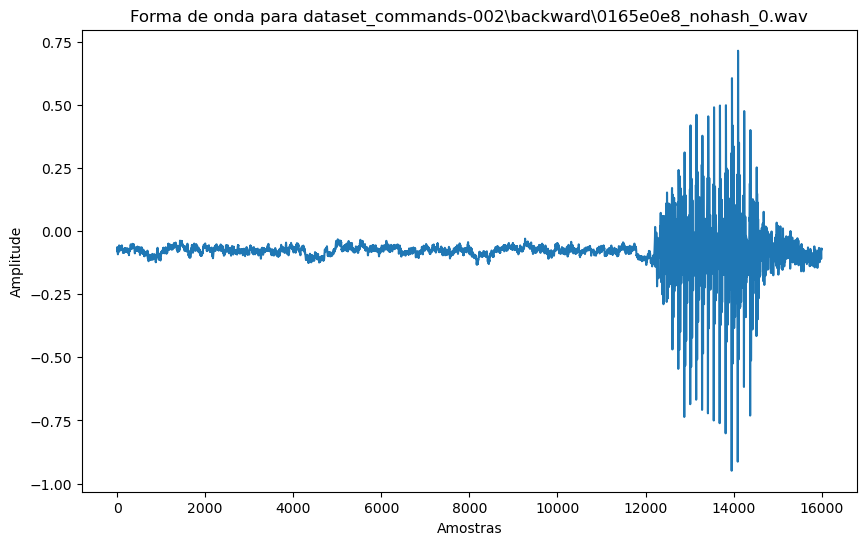

In [10]:
# Plotar a forma de onda
plt.figure(figsize=(10, 6))
plt.plot(audio.numpy())
plt.title(f'Forma de onda para {audio_example}')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()